<a href="https://colab.research.google.com/github/AndreiAf02/Data-Balancing-in-ML-DNN/blob/main/ML_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
import seaborn as sns
import pandas as pd

In [2]:
path_to_data2 = 'https://raw.githubusercontent.com/AndreiAf02/Data-Balancing-in-ML-DNN/main/'


In [3]:
def perf_metrics(data, label):
    data_len = len(data)
    # print('Number of iterations:', data_len)
    mean = np.mean(data[label])
    var = np.var(data[label], ddof=1)
    var_mean = var/data_len

    se_mean = np.sqrt(var_mean)
    error_bound = 1.96*se_mean
    CI_low = mean - error_bound
    CI_high = mean + error_bound

    print('Error type:', label)
    print('Mean:', mean)
    print('Variance:', var)
    print('Variance of estimate:', var_mean)
    print('Standard error:', se_mean)
    print('95% Confidence Interval:  [', CI_low, ', ', CI_high, ']')
    print('-----------------------------')


## Simulated Data:

Loading the performance data for the six sampling methods (plus original imbalanced data) collected from fine-tuning for heart disease prediction:

In [4]:
data_orig = pd.read_csv(path_to_data2+ "Simulation_ML_Imbalanced.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2+ "Simulation_ML_SRS_RUS.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2+ "Simulation_ML_SRSwR_RUS.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2+ "Simulation_ML_Sy_RUS.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data2+ "Simulation_ML_Sy2_RUS.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2+ "Simulation_ML_SRS_ROS2.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2+ "Simulation_ML_Sy_ROS2_20.csv", sep=",", header=0)



data_Sy_ROS

,Unnamed: 0,FPR,TPR,FNR,TNR
0,0,0.064878,0.907555,0.092445,0.935122
1,1,0.091109,0.924453,0.075547,0.908891
2,2,0.050661,0.866799,0.133201,0.949339
3,3,0.063476,0.895626,0.104374,0.936524
4,4,0.042251,0.849901,0.150099,0.957749
...,...,...,...,...,...
95,45,0.059071,0.867793,0.132207,0.940929
96,46,0.056067,0.889662,0.110338,0.943933
97,47,0.053264,0.867793,0.132207,0.946736
98,48,0.107129,0.943340,0.056660,0.892871


Original (imbalanced) data performance:

Error type: FPR
Mean: 0.027428914697637117
Variance: 9.922819252857322e-05
Variance of estimate: 1.9845638505714643e-06
Standard error: 0.0014087454882168973
95% Confidence Interval:  [ 0.024667773540731998 ,  0.030190055854542236 ]
-----------------------------
Error type: FNR
Mean: 0.27990059642147114
Variance: 0.0023475042147810994
Variance of estimate: 4.6950084295621986e-05
Standard error: 0.006852013156410456
95% Confidence Interval:  [ 0.26647065063490666 ,  0.2933305422080356 ]
-----------------------------


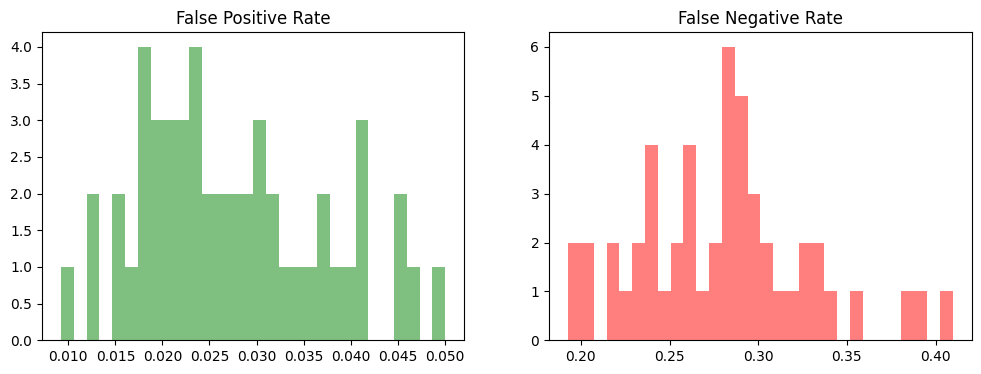

In [5]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

**Random Undersampling:**

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.0932038446135362
Variance: 0.0014914969763006058
Variance of estimate: 1.4914969763006058e-05
Standard error: 0.0038619903887770176
95% Confidence Interval:  [ 0.08563434345153324 ,  0.10077334577553916 ]
-----------------------------
Error type: FNR
Mean: 0.2257157057654075
Variance: 0.005762306594994367
Variance of estimate: 5.7623065949943674e-05
Standard error: 0.007590985835182653
95% Confidence Interval:  [ 0.2108373735284495 ,  0.2405940380023655 ]
-----------------------------


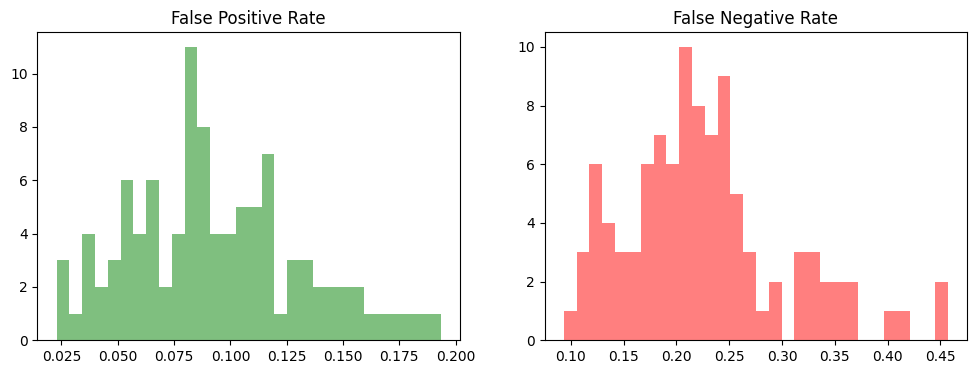

In [6]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.09347817380857024
Variance: 0.0013637729538825275
Variance of estimate: 1.3637729538825275e-05
Standard error: 0.0036929296688165175
95% Confidence Interval:  [ 0.08624003165768986 ,  0.10071631595945062 ]
-----------------------------
Error type: FNR
Mean: 0.22554671968190856
Variance: 0.0044779518563059836
Variance of estimate: 4.4779518563059835e-05
Standard error: 0.006691750037401265
95% Confidence Interval:  [ 0.2124308896086021 ,  0.23866254975521503 ]
-----------------------------


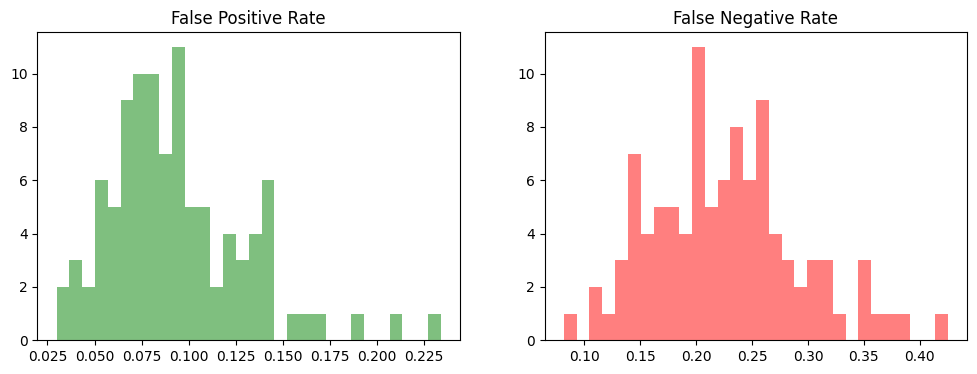

In [7]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.10041649979975967
Variance: 0.0019550857379222984
Variance of estimate: 1.9550857379222985e-05
Standard error: 0.004421635147682697
95% Confidence Interval:  [ 0.09175009491030159 ,  0.10908290468921775 ]
-----------------------------
Error type: FNR
Mean: 0.21734592445328027
Variance: 0.0062991206525132215
Variance of estimate: 6.299120652513221e-05
Standard error: 0.007936699977013885
95% Confidence Interval:  [ 0.20178999249833307 ,  0.23290185640822747 ]
-----------------------------


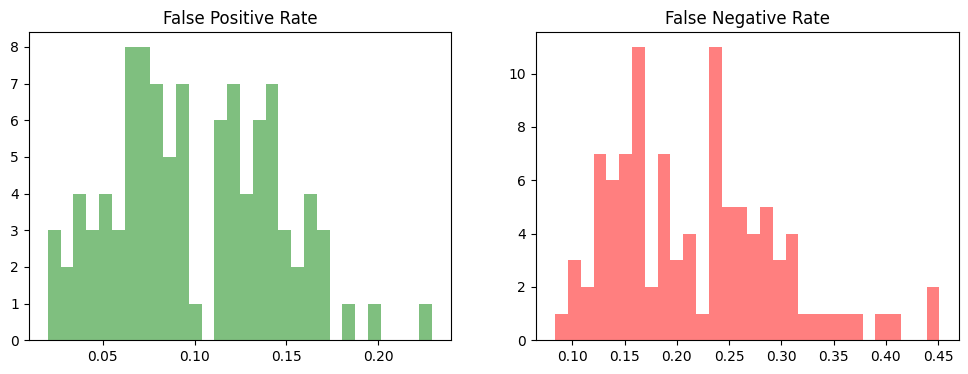

In [8]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.09662394873848616
Variance: 0.0019293828273430397
Variance of estimate: 1.9293828273430395e-05
Standard error: 0.004392474049260894
95% Confidence Interval:  [ 0.08801469960193481 ,  0.10523319787503752 ]
-----------------------------
Error type: FNR
Mean: 0.22350894632206755
Variance: 0.00506450573024292
Variance of estimate: 5.06450573024292e-05
Standard error: 0.007116534079341516
95% Confidence Interval:  [ 0.20956053952655818 ,  0.23745735311757693 ]
-----------------------------


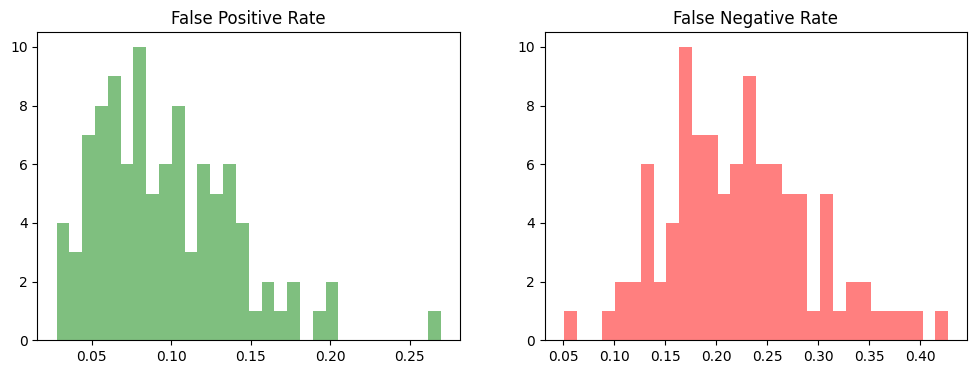

In [9]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

**Random Oversampling:**

SRS Oversampling performance:

Error type: FPR
Mean: 0.061565879059999995
Variance: 0.0005444691088599569
Variance of estimate: 5.4446910885995685e-06
Standard error: 0.0023333861850537234
95% Confidence Interval:  [ 0.056992442137294694 ,  0.0661393159827053 ]
-----------------------------
Error type: FNR
Mean: 0.12329025843999998
Variance: 0.0015089584789020772
Variance of estimate: 1.5089584789020772e-05
Standard error: 0.003884531476126918
95% Confidence Interval:  [ 0.11567657674679122 ,  0.13090394013320875 ]
-----------------------------


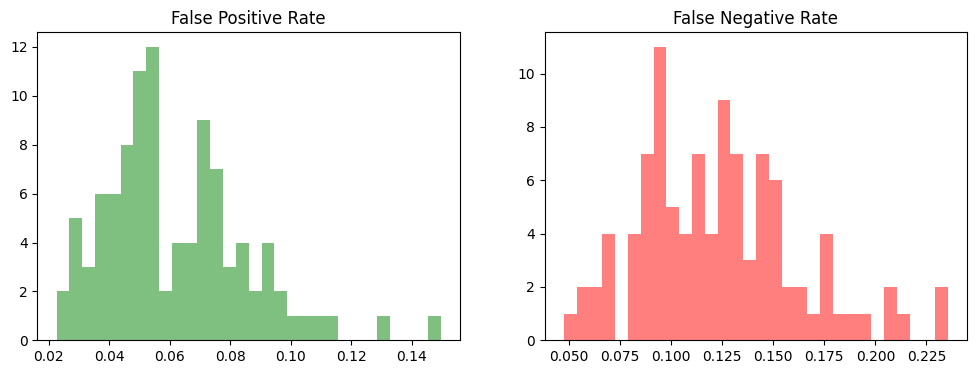

In [10]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.05546655984000001
Variance: 0.00047650615933866647
Variance of estimate: 4.765061593386665e-06
Standard error: 0.00218290210348212
95% Confidence Interval:  [ 0.05118807171717506 ,  0.05974504796282497 ]
-----------------------------
Error type: FNR
Mean: 0.13464214706000002
Variance: 0.00211210147428328
Variance of estimate: 2.1121014742832802e-05
Standard error: 0.004595760518437923
95% Confidence Interval:  [ 0.1256344564438617 ,  0.14364983767613834 ]
-----------------------------


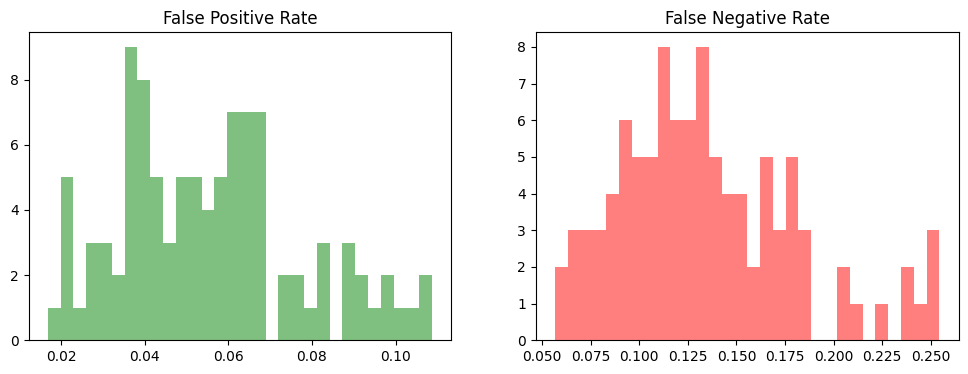

In [11]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [12]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.082899,0.096316,0.173208,0.108330,0.092911,0.064878,0.031237
1,0.130557,0.071886,0.020024,0.060072,0.050861,0.091109,0.018622
2,0.062475,0.072287,0.139367,0.128955,0.085302,0.050661,0.045655
3,0.085102,0.105126,0.056468,0.070084,0.072487,0.063476,0.041850
4,0.108530,0.136964,0.096516,0.108730,0.037044,0.042251,0.035443
...,...,...,...,...,...,...,...
95,0.116340,0.067481,0.077293,0.069483,0.074890,0.059071,NaN
96,0.084702,0.061073,0.082099,0.137565,0.076492,0.056067,NaN
97,0.108130,0.075090,0.111133,0.067080,0.047657,0.053264,NaN
98,0.130757,0.073088,0.053664,0.174610,0.110332,0.107129,NaN


<Axes: title={'center': 'FPR'}>

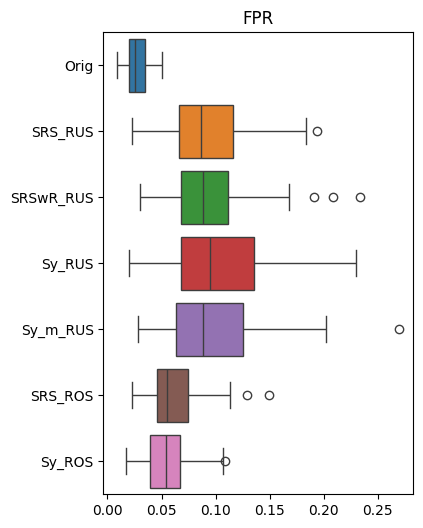

In [17]:
dataset = FPR

plt.figure(figsize=(4,6)) #, dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [14]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.231610,0.196819,0.103380,0.225646,0.093439,0.092445,0.255467
1,0.173956,0.261431,0.451292,0.271372,0.125249,0.075547,0.291252
2,0.268390,0.255467,0.127237,0.165010,0.094433,0.133201,0.237575
3,0.214712,0.163022,0.273360,0.249503,0.124254,0.104374,0.192843
4,0.212724,0.174950,0.196819,0.170974,0.173956,0.150099,0.231610
...,...,...,...,...,...,...,...
95,0.162028,0.240557,0.246521,0.226640,0.092445,0.132207,NaN
96,0.262425,0.267396,0.256461,0.165010,0.086481,0.110338,NaN
97,0.162028,0.205765,0.216700,0.208748,0.136183,0.132207,NaN
98,0.128231,0.255467,0.310139,0.098410,0.062624,0.056660,NaN


<Axes: title={'center': 'FNR'}>

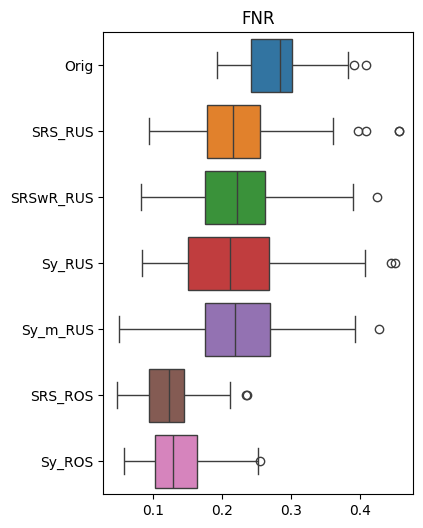

In [19]:
dataset = FNR

plt.figure(figsize=(4,6)) #, dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## "CDC Diabetes Health Indicators" Data:

Loading the performance data for the six sampling methods (plus original imbalanced data) collected from fine-tuning for heart disease prediction:

In [20]:
data_orig = pd.read_csv(path_to_data2+ "Diabetes_ML_Imbalanced.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2+ "Diabetes_ML_SRS_RUS.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2+ "Diabetes_ML_SRSwR_RUS.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2+ "Diabetes_ML_Sy_RUS.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data2+ "Diabetes_ML_Sy2_RUS.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2+ "Diabetes_ML_SRS_ROS2.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2+ "Diabetes_ML_Sy_ROS2_20.csv", sep=",", header=0)



data_Sy_ROS

,Unnamed: 0,FPR,TPR,FNR,TNR
0,0,0.197565,0.676328,0.323672,0.802435
1,1,0.182631,0.653169,0.346831,0.817369
2,2,0.214153,0.695049,0.304951,0.785847
3,3,0.189500,0.666204,0.333796,0.810500
4,4,0.217071,0.703925,0.296075,0.782929
5,5,0.196071,0.674248,0.325752,0.803929
6,6,0.180976,0.645542,0.354458,0.819024
7,7,0.164802,0.618500,0.381500,0.835198
8,8,0.162964,0.618777,0.381223,0.837036
9,9,0.189316,0.661212,0.338788,0.810684


Original (imbalanced) data performance:

Error type: FPR
Mean: 0.01865226881355539
Variance: 3.689180986409528e-05
Variance of estimate: 7.378361972819056e-07
Standard error: 0.0008589739211884756
95% Confidence Interval:  [ 0.016968679928025976 ,  0.020335857699084803 ]
-----------------------------
Error type: FNR
Mean: 0.8340951324480376
Variance: 0.0013476432040087649
Variance of estimate: 2.69528640801753e-05
Standard error: 0.005191614785418435
95% Confidence Interval:  [ 0.8239195674686174 ,  0.8442706974274578 ]
-----------------------------


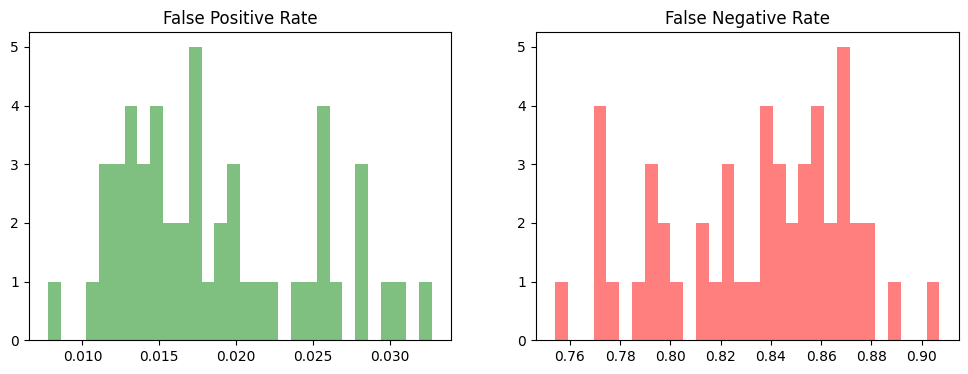

In [21]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

**Random Undersampling:**

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.19867179782392302
Variance: 0.0008207037182229031
Variance of estimate: 8.207037182229031e-06
Standard error: 0.002864792694459589
95% Confidence Interval:  [ 0.19305680414278223 ,  0.20428679150506382 ]
-----------------------------
Error type: FNR
Mean: 0.3268700596332658
Variance: 0.002033294747059397
Variance of estimate: 2.033294747059397e-05
Standard error: 0.004509206966928217
95% Confidence Interval:  [ 0.3180320139780865 ,  0.33570810528844514 ]
-----------------------------


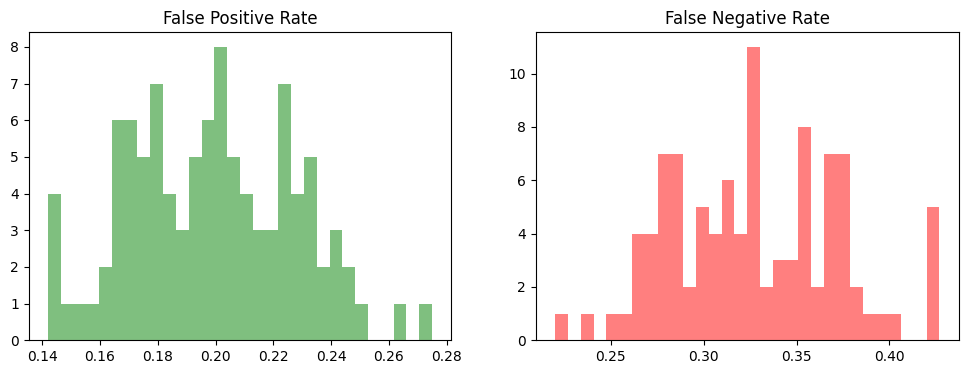

In [22]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.19952923608195863
Variance: 0.0012104994311894512
Variance of estimate: 1.2104994311894511e-05
Standard error: 0.0034792232339840613
95% Confidence Interval:  [ 0.19270995854334988 ,  0.2063485136205674 ]
-----------------------------
Error type: FNR
Mean: 0.32763555679266254
Variance: 0.0031906269498083784
Variance of estimate: 3.1906269498083784e-05
Standard error: 0.0056485634897807235
95% Confidence Interval:  [ 0.3165643723526923 ,  0.3387067412326328 ]
-----------------------------


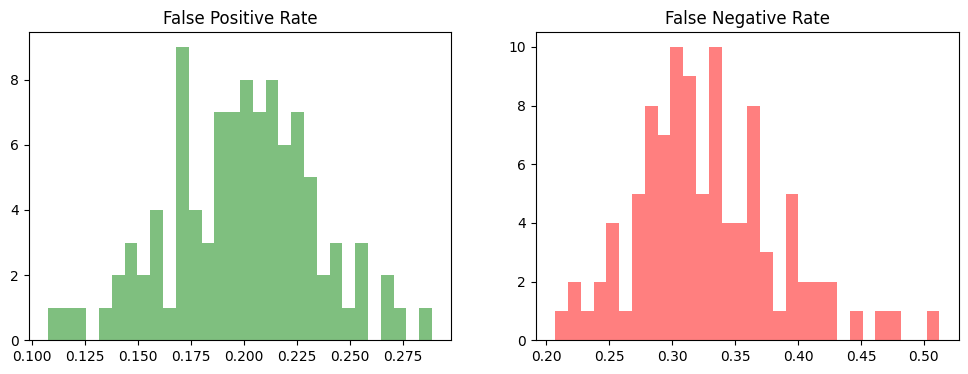

In [23]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.1916264215935554
Variance: 0.0009682722406559697
Variance of estimate: 9.682722406559697e-06
Standard error: 0.003111707313768391
95% Confidence Interval:  [ 0.18552747525856933 ,  0.19772536792854145 ]
-----------------------------
Error type: FNR
Mean: 0.33889058383436416
Variance: 0.0024825424895222273
Variance of estimate: 2.4825424895222275e-05
Standard error: 0.004982511906179681
95% Confidence Interval:  [ 0.32912486049825196 ,  0.34865630717047635 ]
-----------------------------


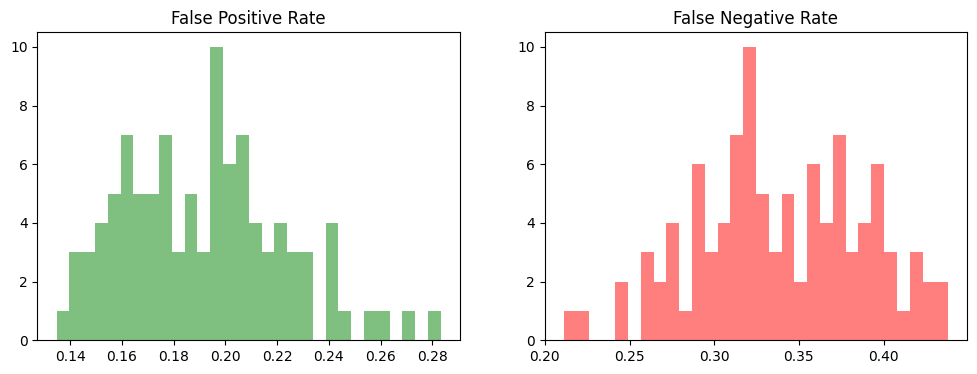

In [24]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.19636300976450316
Variance: 0.0010125399279576285
Variance of estimate: 1.0125399279576286e-05
Standard error: 0.0031820432554533705
95% Confidence Interval:  [ 0.19012620498381455 ,  0.20259981454519177 ]
-----------------------------
Error type: FNR
Mean: 0.3319719872428304
Variance: 0.002605630199482274
Variance of estimate: 2.605630199482274e-05
Standard error: 0.005104537392832257
95% Confidence Interval:  [ 0.32196709395287915 ,  0.34197688053278164 ]
-----------------------------


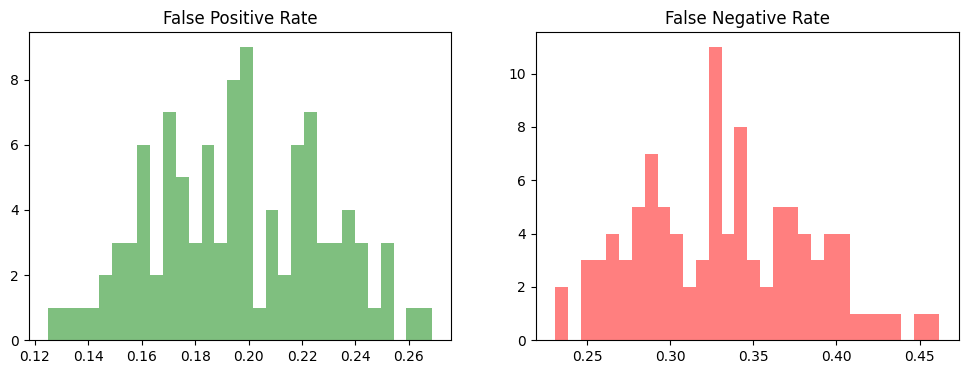

In [25]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

**Random Oversampling:**

SRS Oversampling performance:

Error type: FPR
Mean: 0.194128891446
Variance: 0.0003213170177497809
Variance of estimate: 6.426340354995618e-06
Standard error: 0.0025350227523625144
95% Confidence Interval:  [ 0.18916024685136948 ,  0.19909753604063055 ]
-----------------------------
Error type: FNR
Mean: 0.33022881707799995
Variance: 0.0008324405056079309
Variance of estimate: 1.6648810112158617e-05
Standard error: 0.0040802953461923095
95% Confidence Interval:  [ 0.32223143819946304 ,  0.33822619595653686 ]
-----------------------------


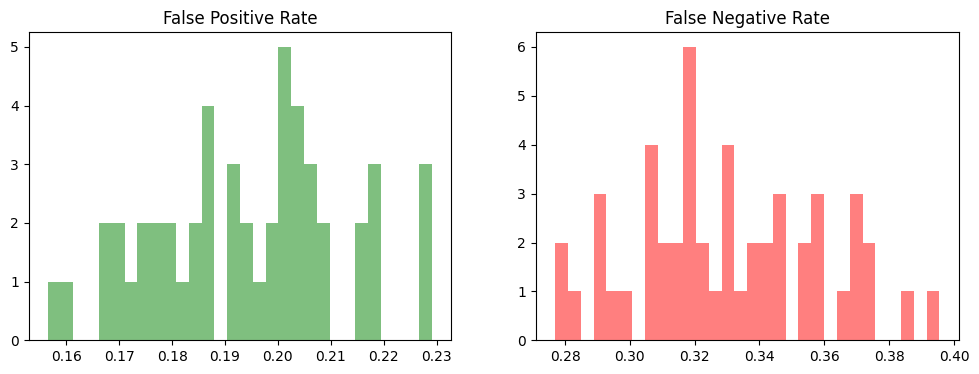

In [26]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.18777162546
Variance: 0.00042457723082095316
Variance of estimate: 8.491544616419063e-06
Standard error: 0.0029140255003035
95% Confidence Interval:  [ 0.18206013547940514 ,  0.19348311544059488 ]
-----------------------------
Error type: FNR
Mean: 0.34166689782
Variance: 0.0011265356198040626
Variance of estimate: 2.2530712396081253e-05
Standard error: 0.004746652757057467
95% Confidence Interval:  [ 0.3323634584161673 ,  0.35097033722383264 ]
-----------------------------


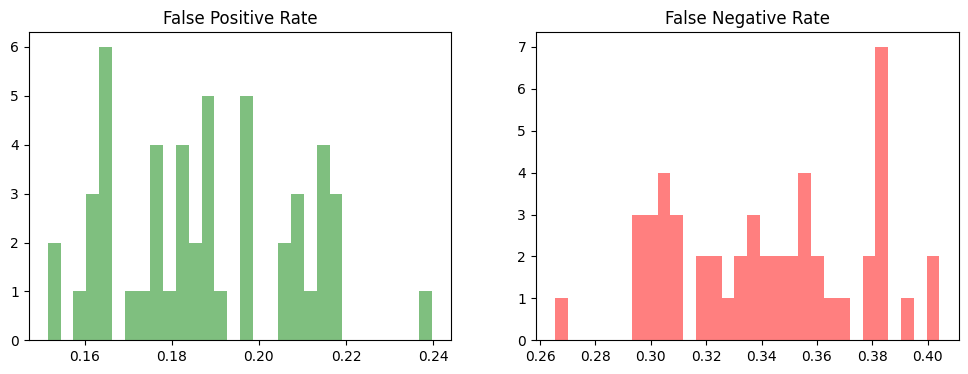

In [27]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [28]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.143228,0.141022,0.209558,0.176175,0.187777,0.197565,0.014153
1,0.227708,0.187295,0.202964,0.220425,0.218863,0.182631,0.013464
2,0.152602,0.253509,0.134773,0.132453,0.217094,0.214153,0.028374
3,0.230879,0.245905,0.163354,0.196646,0.168478,0.189500,0.011534
4,0.145847,0.211373,0.144859,0.187341,0.156508,0.217071,0.011166
...,...,...,...,...,...,...,...
95,0.194026,0.194693,0.244963,0.171419,NaN,NaN,NaN
96,0.193935,0.217714,0.157013,0.216565,NaN,NaN,NaN
97,0.214543,0.220195,0.163929,0.138955,NaN,NaN,NaN
98,0.202872,0.191683,0.272028,0.216979,NaN,NaN,NaN


<Axes: title={'center': 'FPR'}>

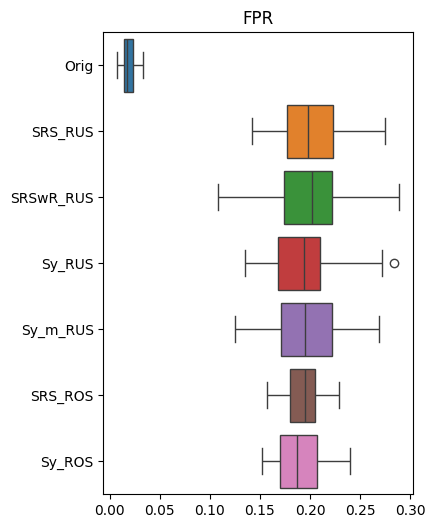

In [33]:
dataset = FPR

plt.figure(figsize=(4,6)) #, dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [30]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.420885,0.430453,0.306060,0.361808,0.338372,0.323672,0.860907
1,0.280128,0.343364,0.319789,0.291360,0.291083,0.346831,0.866177
2,0.404105,0.250728,0.438081,0.446817,0.289280,0.304951,0.771183
3,0.275413,0.252808,0.391069,0.325614,0.372903,0.333796,0.876716
4,0.422410,0.303564,0.418111,0.343087,0.395507,0.296075,0.880876
...,...,...,...,...,...,...,...
95,0.328665,0.334489,0.257385,0.366246,NaN,NaN,NaN
96,0.325198,0.293163,0.397310,0.300374,NaN,NaN,NaN
97,0.297185,0.292054,0.395230,0.436971,NaN,NaN,NaN
98,0.315490,0.335182,0.222438,0.294411,NaN,NaN,NaN


<Axes: title={'center': 'FNR'}>

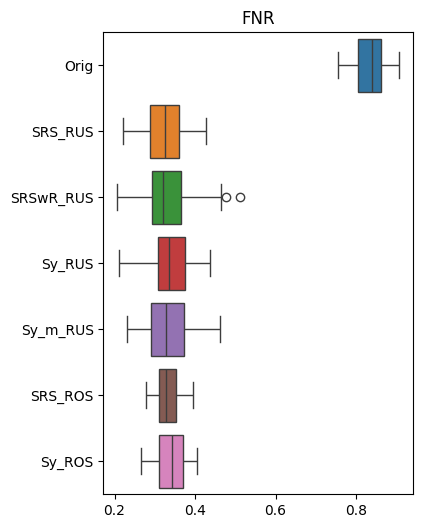

In [35]:
dataset = FNR

plt.figure(figsize=(4,6)) #, dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## "Adult" Data:

In [36]:
data_orig = pd.read_csv(path_to_data2+ "Adult_ML_Imbalanced.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2+ "Adult_ML_SRS_RUS.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2+ "Adult_ML_SRSwR_RUS.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2+ "Adult_ML_Sy_RUS.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data2+ "Adult_ML_Sy2_RUS.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2+ "Adult_ML_SRS_ROS2.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2+ "Adult_ML_Sy_ROS2_20.csv", sep=",", header=0)



data_Sy_ROS

,Unnamed: 0,FPR,TPR,FNR,TNR
0,0,0.123166,0.729013,0.270987,0.876834
1,1,0.169112,0.808177,0.191823,0.830888
2,2,0.073900,0.615050,0.384950,0.926100
3,3,0.125104,0.738147,0.261853,0.874896
4,4,0.134099,0.746411,0.253589,0.865901
...,...,...,...,...,...
95,45,0.164406,0.799478,0.200522,0.835594
96,46,0.114448,0.714659,0.285341,0.885552
97,47,0.154166,0.785124,0.214876,0.845834
98,48,0.147661,0.776860,0.223140,0.852339


Original (imbalanced) data performance:

Error type: FPR
Mean: 0.06733462496540268
Variance: 0.00030147689881124506
Variance of estimate: 6.029537976224901e-06
Standard error: 0.0024555117544464945
95% Confidence Interval:  [ 0.06252182192668755 ,  0.07214742800411782 ]
-----------------------------
Error type: FNR
Mean: 0.4071683340582862
Variance: 0.0024773733982974395
Variance of estimate: 4.9547467965948786e-05
Standard error: 0.0070389962328409285
95% Confidence Interval:  [ 0.39337190144191797 ,  0.4209647666746544 ]
-----------------------------


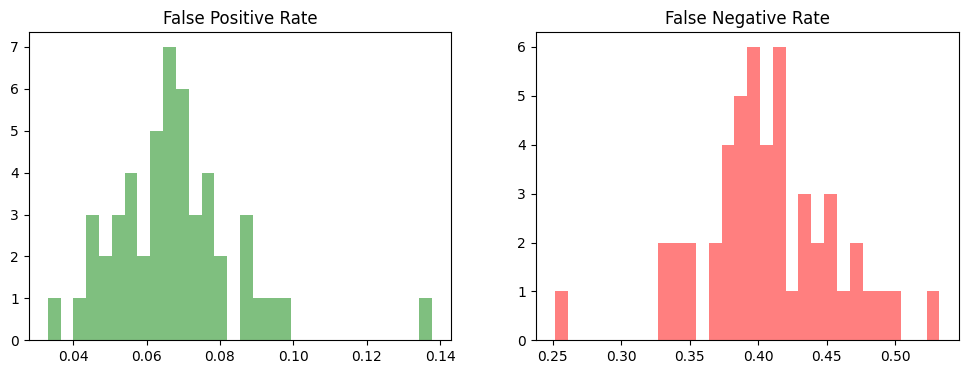

In [37]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

**Random Undersampling:**

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.1375089952976972
Variance: 0.001110800174399416
Variance of estimate: 1.110800174399416e-05
Standard error: 0.003332866895631171
95% Confidence Interval:  [ 0.1309765761822601 ,  0.14404141441313428 ]
-----------------------------
Error type: FNR
Mean: 0.25575467594406265
Variance: 0.003251040006432397
Variance of estimate: 3.2510400064323966e-05
Standard error: 0.005701789198516898
95% Confidence Interval:  [ 0.24457916911496952 ,  0.2669301827731558 ]
-----------------------------


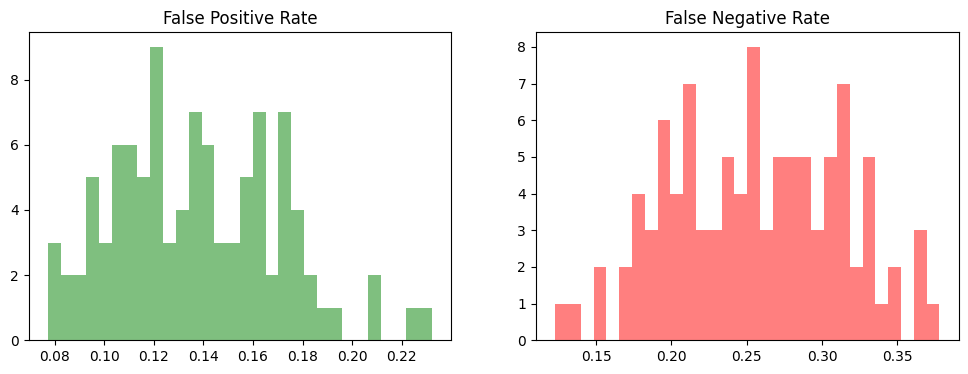

In [38]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.13591613616337664
Variance: 0.0008918418320613768
Variance of estimate: 8.918418320613768e-06
Standard error: 0.002986372100159953
95% Confidence Interval:  [ 0.13006284684706312 ,  0.14176942547969015 ]
-----------------------------
Error type: FNR
Mean: 0.258042627232301
Variance: 0.0028322158270107914
Variance of estimate: 2.8322158270107914e-05
Standard error: 0.005321856656290915
95% Confidence Interval:  [ 0.2476117881859708 ,  0.26847346627863117 ]
-----------------------------


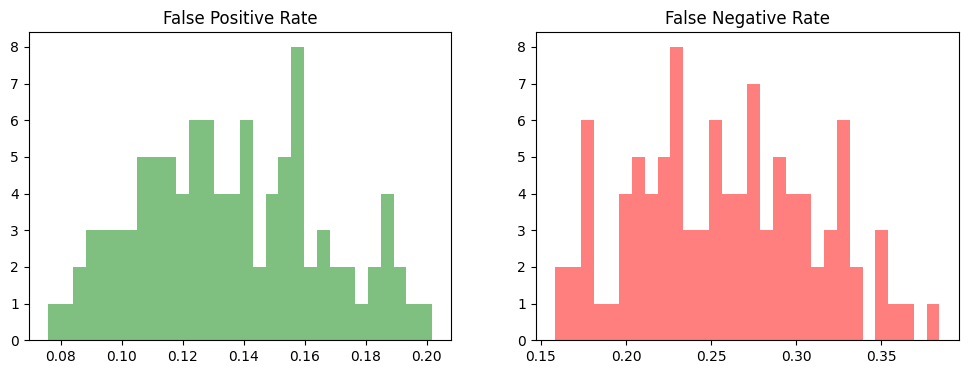

In [39]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.13777193466626073
Variance: 0.0012001245456713765
Variance of estimate: 1.2001245456713764e-05
Standard error: 0.0034642813766658396
95% Confidence Interval:  [ 0.1309819431679957 ,  0.14456192616452576 ]
-----------------------------
Error type: FNR
Mean: 0.25519356240491514
Variance: 0.0034919426294682926
Variance of estimate: 3.4919426294682926e-05
Standard error: 0.005909266138420483
95% Confidence Interval:  [ 0.243611400773611 ,  0.2667757240362193 ]
-----------------------------


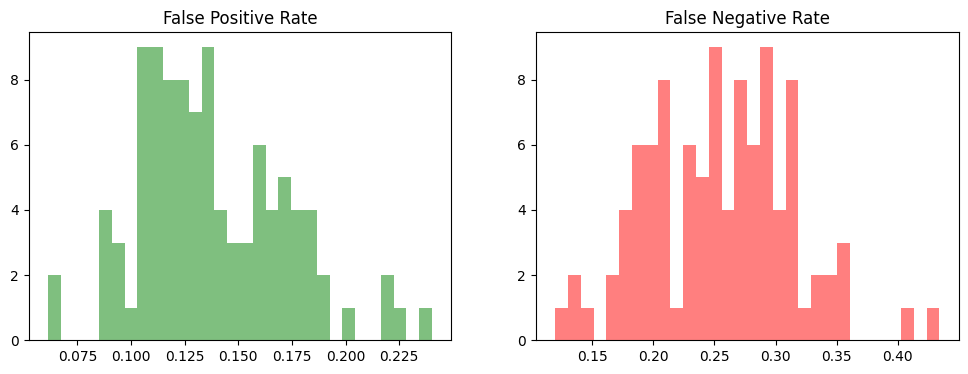

In [40]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.13973152505619152
Variance: 0.0012060170640555866
Variance of estimate: 1.2060170640555866e-05
Standard error: 0.0034727756392482177
95% Confidence Interval:  [ 0.132924884803265 ,  0.14653816530911803 ]
-----------------------------
Error type: FNR
Mean: 0.2523183993129795
Variance: 0.0036766251017984167
Variance of estimate: 3.676625101798417e-05
Standard error: 0.00606351803971788
95% Confidence Interval:  [ 0.24043390395513245 ,  0.2642028946708265 ]
-----------------------------


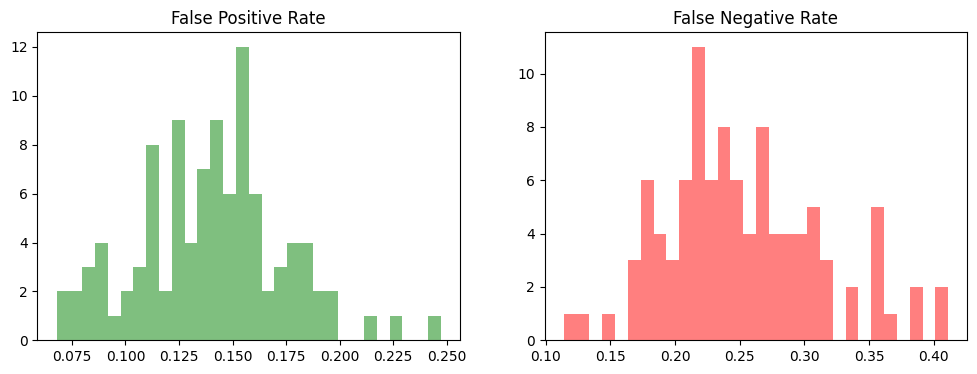

In [41]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

**Random Oversampling:**

SRS Oversampling performance:

Error type: FPR
Mean: 0.13836839191907827
Variance: 0.0007744291367629169
Variance of estimate: 7.744291367629169e-06
Standard error: 0.002782856691895788
95% Confidence Interval:  [ 0.1329139928029625 ,  0.14382279103519402 ]
-----------------------------
Error type: FNR
Mean: 0.24588951717246188
Variance: 0.0022045306084199066
Variance of estimate: 2.2045306084199066e-05
Standard error: 0.004695242920680363
95% Confidence Interval:  [ 0.23668684104792836 ,  0.2550921932969954 ]
-----------------------------


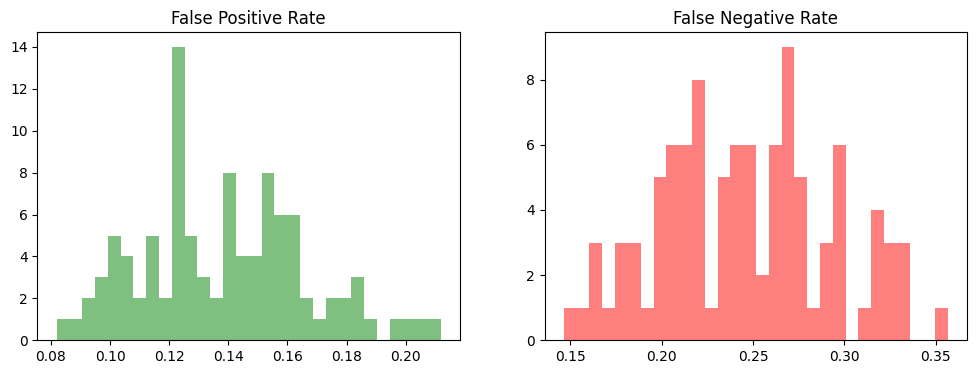

In [42]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.13563659004
Variance: 0.000639705678903512
Variance of estimate: 6.3970567890351205e-06
Standard error: 0.0025292403580986765
95% Confidence Interval:  [ 0.1306792789381266 ,  0.14059390114187342 ]
-----------------------------
Error type: FNR
Mean: 0.25076555022
Variance: 0.002042922864957749
Variance of estimate: 2.042922864957749e-05
Standard error: 0.004519870423980923
95% Confidence Interval:  [ 0.24190660418899743 ,  0.25962449625100265 ]
-----------------------------


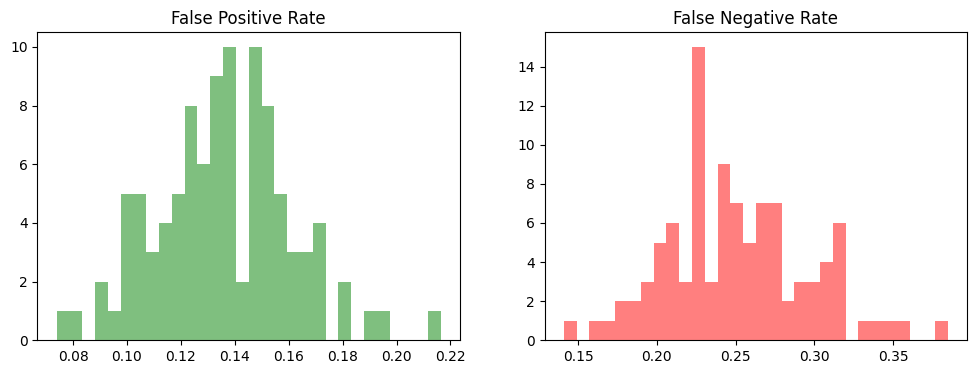

In [43]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [44]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.131608,0.097980,0.167451,0.136867,0.142818,0.123166,0.049543
1,0.110988,0.124827,0.112510,0.139911,0.125381,0.169112,0.064489
2,0.158179,0.088292,0.110296,0.128702,0.144201,0.073900,0.068087
3,0.141572,0.195959,0.178245,0.136452,0.102131,0.125104,0.076944
4,0.103238,0.110435,0.240382,0.184750,0.116385,0.134099,0.057293
...,...,...,...,...,...,...,...
95,0.140050,0.150014,0.111126,0.144617,0.148630,0.164406,NaN
96,0.077221,0.143925,0.187656,0.125796,0.106698,0.114448,NaN
97,0.160947,0.085940,0.120399,0.152782,0.184750,0.154166,NaN
98,0.160116,0.088984,0.170219,0.156795,0.121091,0.147661,NaN


<Axes: title={'center': 'FPR'}>

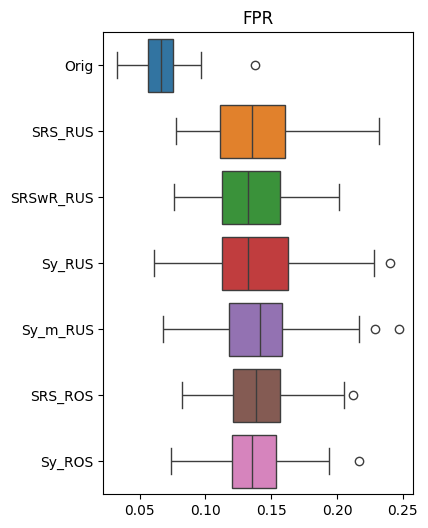

In [47]:
dataset = FPR

plt.figure(figsize=(4,6)) #, dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [48]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.263158,0.321009,0.203567,0.254023,0.236190,0.270987,0.464115
1,0.301435,0.270987,0.294911,0.241844,0.265333,0.191823,0.416268
2,0.209221,0.348847,0.295781,0.266638,0.245324,0.384950,0.399739
3,0.243584,0.160940,0.186603,0.249674,0.317964,0.261853,0.373641
4,0.313615,0.304915,0.119617,0.180078,0.279687,0.253589,0.428012
...,...,...,...,...,...,...,...
95,0.250979,0.231405,0.302740,0.237060,0.218791,0.200522,NaN
96,0.377990,0.235320,0.181383,0.262723,0.296216,0.285341,NaN
97,0.217921,0.355807,0.281427,0.222706,0.181818,0.214876,NaN
98,0.212266,0.351022,0.193127,0.213136,0.277947,0.223140,NaN


<Axes: title={'center': 'FNR'}>

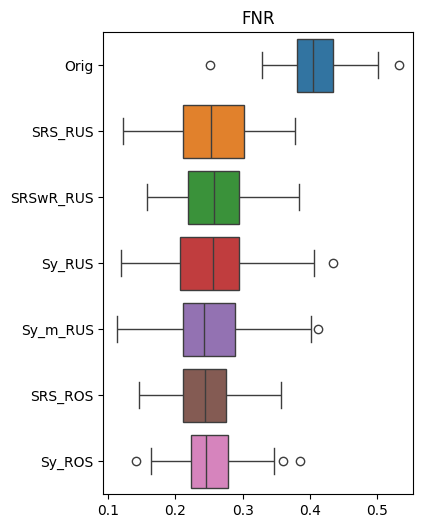

In [51]:
dataset = FNR

plt.figure(figsize=(4,6)) #, dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## "Bank Marketing" Data:

In [52]:
data_orig = pd.read_csv(path_to_data2+ "Bank_Marketing_ML_Imbalanced.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2+ "Bank_Marketing_ML_SRS_RUS.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2+ "Bank_Marketing_ML_SRSwR_RUS.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2+ "Bank_Marketing_ML_Sy_RUS.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data2+ "Bank_Marketing_ML_Sy2_RUS.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2+ "Bank_Marketing_ML_SRS_ROS2.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2+ "Bank_Marketing_ML_Sy_ROS2_20.csv", sep=",", header=0)



data_Sy_ROS

,Unnamed: 0,FPR,TPR,FNR,TNR
0,0,0.096981,0.707490,0.292510,0.903019
1,1,0.153836,0.826923,0.173077,0.846164
2,2,0.175402,0.854251,0.145749,0.824598
3,3,0.154359,0.822874,0.177126,0.845641
4,4,0.124167,0.776316,0.223684,0.875833
...,...,...,...,...,...
95,45,0.177624,0.857287,0.142713,0.822376
96,46,0.134100,0.779352,0.220648,0.865900
97,47,0.129526,0.787449,0.212551,0.870474
98,48,0.135538,0.803644,0.196356,0.864462


Original (imbalanced) data performance:

Error type: FPR
Mean: 0.03376552084694807
Variance: 6.278072020714363e-05
Variance of estimate: 1.2556144041428727e-06
Standard error: 0.0011205420135554367
95% Confidence Interval:  [ 0.031569258500379414 ,  0.03596178319351672 ]
-----------------------------
Error type: FNR
Mean: 0.627085020242915
Variance: 0.0028417587100732227
Variance of estimate: 5.683517420146445e-05
Standard error: 0.007538910677376703
95% Confidence Interval:  [ 0.6123087553152566 ,  0.6418612851705734 ]
-----------------------------


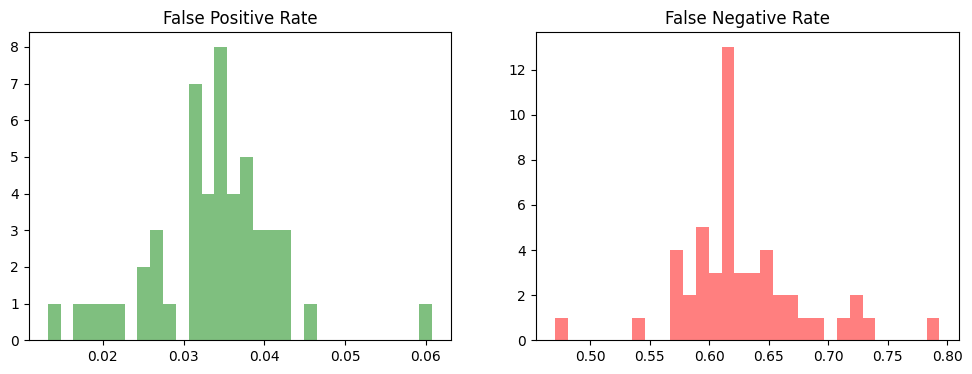

In [53]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

**Random Undersampling:**

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.14353417854
Variance: 0.0006632044995205103
Variance of estimate: 6.632044995205102e-06
Standard error: 0.0025752757124636386
95% Confidence Interval:  [ 0.13848663814357126 ,  0.14858171893642874 ]
-----------------------------
Error type: FNR
Mean: 0.24961538464000008
Variance: 0.002385427560883055
Variance of estimate: 2.385427560883055e-05
Standard error: 0.004884083906817178
95% Confidence Interval:  [ 0.2400425801826384 ,  0.25918818909736174 ]
-----------------------------


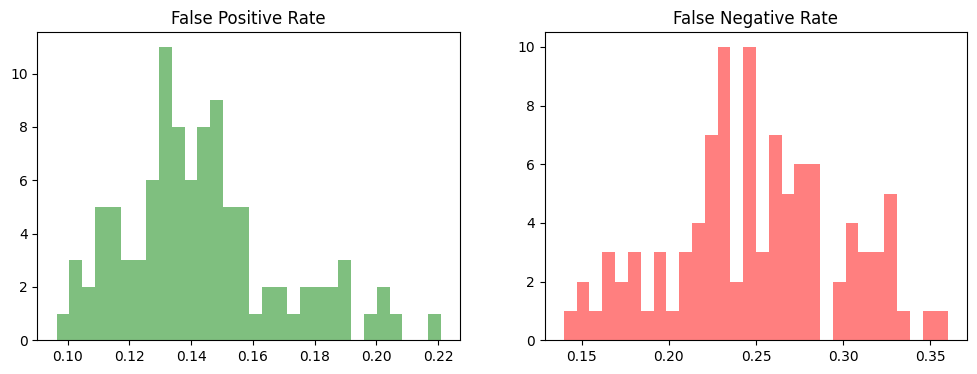

In [54]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.14191478235000002
Variance: 0.00043459901247408354
Variance of estimate: 4.345990124740835e-06
Standard error: 0.0020847038458113986
95% Confidence Interval:  [ 0.13782876281220968 ,  0.14600080188779035 ]
-----------------------------
Error type: FNR
Mean: 0.25156882593
Variance: 0.0017904581140965915
Variance of estimate: 1.7904581140965916e-05
Standard error: 0.004231380524245712
95% Confidence Interval:  [ 0.24327532010247843 ,  0.2598623317575216 ]
-----------------------------


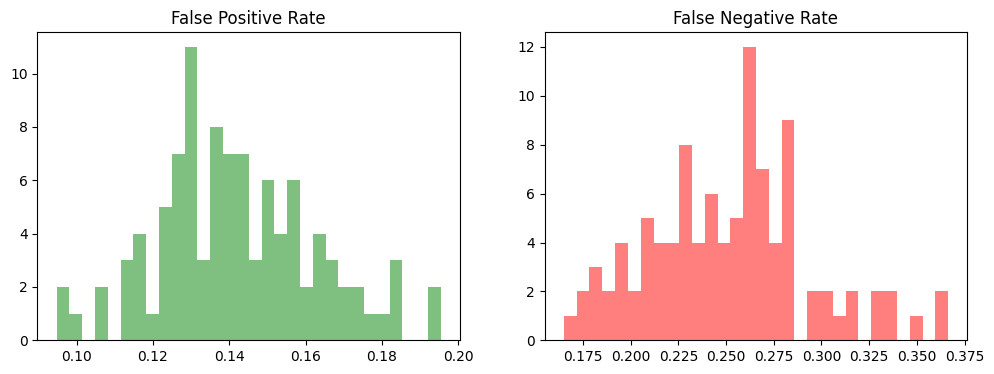

In [55]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.14333159067
Variance: 0.0006139648907571966
Variance of estimate: 6.139648907571966e-06
Standard error: 0.0024778314929736374
95% Confidence Interval:  [ 0.13847504094377167 ,  0.14818814039622835 ]
-----------------------------
Error type: FNR
Mean: 0.24755060733999998
Variance: 0.0022855168192720825
Variance of estimate: 2.2855168192720826e-05
Standard error: 0.004780707917528619
95% Confidence Interval:  [ 0.2381804198216439 ,  0.25692079485835606 ]
-----------------------------


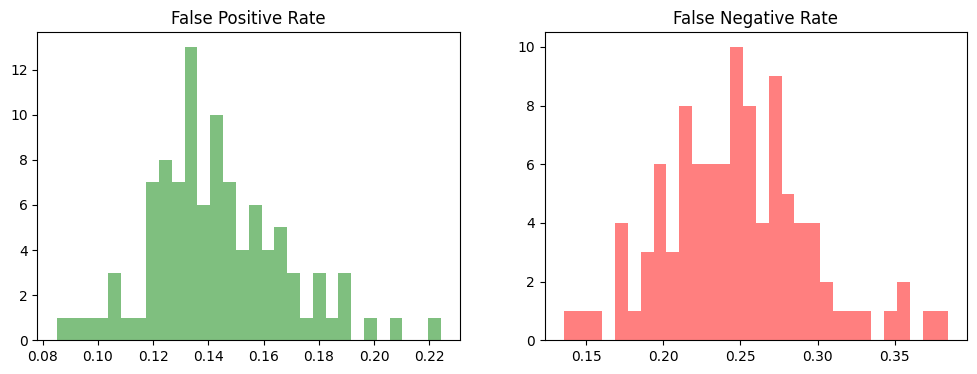

In [56]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.14449091624000002
Variance: 0.0005653932705846613
Variance of estimate: 5.653932705846613e-06
Standard error: 0.0023777999717904392
95% Confidence Interval:  [ 0.13983042829529074 ,  0.1491514041847093 ]
-----------------------------
Error type: FNR
Mean: 0.24760121457
Variance: 0.0021087022673138664
Variance of estimate: 2.1087022673138665e-05
Standard error: 0.004592060830731521
95% Confidence Interval:  [ 0.2386007753417662 ,  0.2566016537982338 ]
-----------------------------


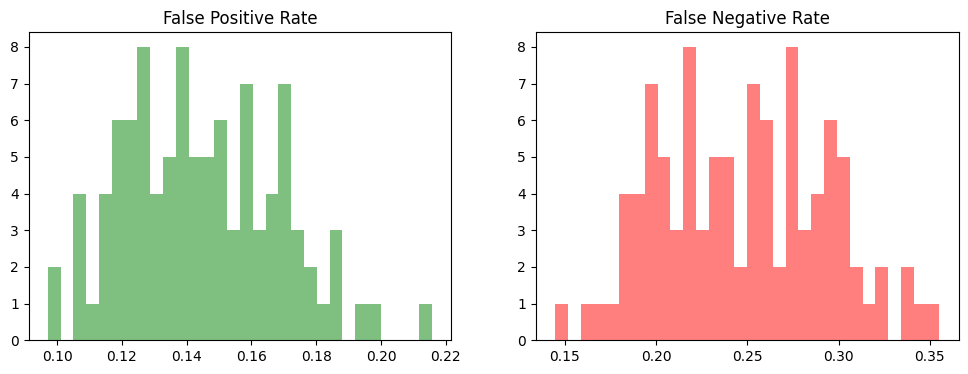

In [57]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

**Random Oversampling:**

SRS Oversampling performance:

Error type: FPR
Mean: 0.14121029929999998
Variance: 0.0004491750078798889
Variance of estimate: 4.491750078798889e-06
Standard error: 0.0021193749264344164
95% Confidence Interval:  [ 0.13705632444418853 ,  0.14536427415581143 ]
-----------------------------
Error type: FNR
Mean: 0.1975607288
Variance: 0.001243062480575941
Variance of estimate: 1.2430624805759412e-05
Standard error: 0.0035257091209796947
95% Confidence Interval:  [ 0.1906503389228798 ,  0.2044711186771202 ]
-----------------------------


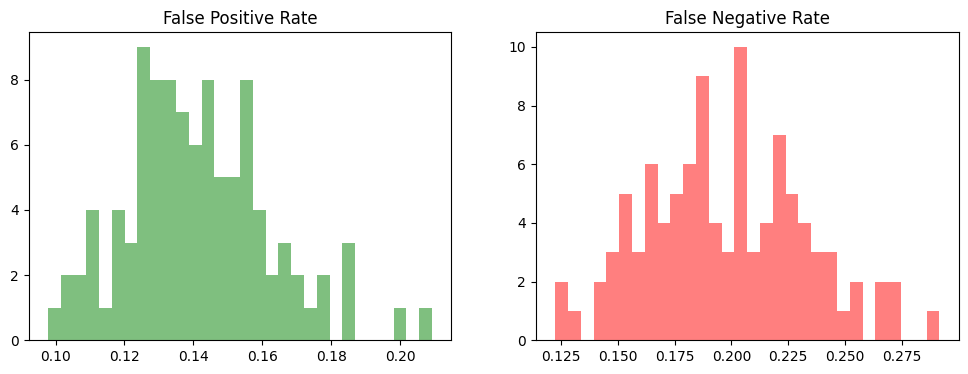

In [58]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.14043915825
Variance: 0.0005789685433834142
Variance of estimate: 5.789685433834143e-06
Standard error: 0.002406176517596775
95% Confidence Interval:  [ 0.13572305227551032 ,  0.14515526422448968 ]
-----------------------------
Error type: FNR
Mean: 0.20013157898999995
Variance: 0.0019772677772985736
Variance of estimate: 1.9772677772985735e-05
Standard error: 0.004446647925458652
95% Confidence Interval:  [ 0.191416149056101 ,  0.2088470089238989 ]
-----------------------------


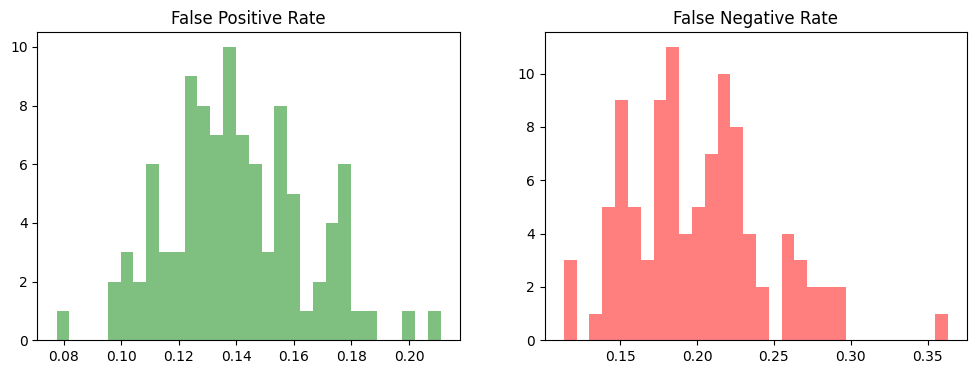

In [59]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [60]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.133185,0.127565,0.206640,0.122206,0.139459,0.096981,0.033982
1,0.138413,0.180238,0.141289,0.144818,0.145863,0.153836,0.034505
2,0.153575,0.124951,0.119462,0.116194,0.145471,0.175402,0.036204
3,0.190955,0.142465,0.191086,0.149523,0.117762,0.154359,0.033590
4,0.128349,0.123513,0.161155,0.177493,0.166776,0.124167,0.042347
...,...,...,...,...,...,...,...
95,0.182068,0.131225,0.133577,0.160894,0.161809,0.177624,NaN
96,0.124951,0.185205,0.096589,0.153313,0.132401,0.134100,NaN
97,0.118285,0.139459,0.157365,0.118677,0.143903,0.129526,NaN
98,0.119592,0.158149,0.141027,0.109790,0.127565,0.135538,NaN


<Axes: title={'center': 'FPR'}>

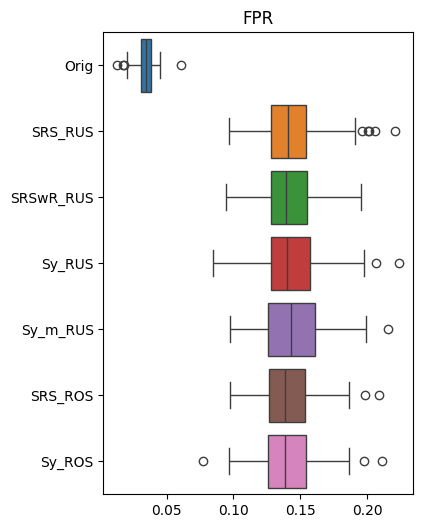

In [63]:
dataset = FPR

plt.figure(figsize=(4,6)) #, dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [64]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.266194,0.269231,0.146761,0.287449,0.182186,0.292510,0.631579
1,0.264170,0.191296,0.239879,0.248988,0.192308,0.173077,0.616397
2,0.233806,0.298583,0.297571,0.304656,0.181174,0.145749,0.606275
3,0.167004,0.239879,0.180162,0.239879,0.239879,0.177126,0.614372
4,0.267206,0.285425,0.211538,0.184211,0.155870,0.223684,0.569838
...,...,...,...,...,...,...,...
95,0.194332,0.265182,0.259109,0.203441,0.151822,0.142713,NaN
96,0.294534,0.164980,0.355263,0.226721,0.202429,0.220648,NaN
97,0.308704,0.255061,0.216599,0.292510,0.185223,0.212551,NaN
98,0.298583,0.217611,0.254049,0.337045,0.222672,0.196356,NaN


<Axes: title={'center': 'FNR'}>

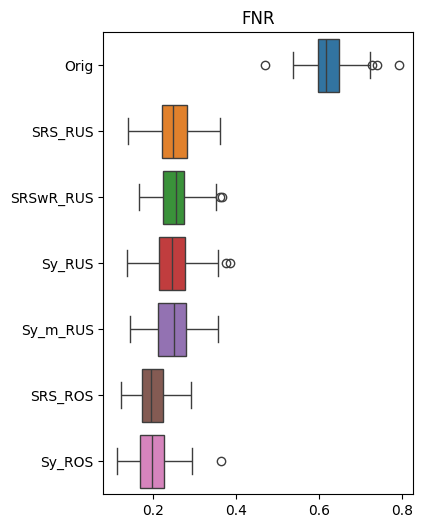

In [67]:
dataset = FNR

plt.figure(figsize=(4,6)) #, dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

## "Default of Credit Card Clients" Data:

In [68]:
data_orig = pd.read_csv(path_to_data2+ "Credit_Default_ML_Imbalanced.csv", sep=",", header=0)
data_SRS = pd.read_csv(path_to_data2+ "Credit_Default_ML_SRS_RUS.csv", sep=",", header=0)
data_SRSwR = pd.read_csv(path_to_data2+ "Credit_Default_ML_SRSwR_RUS.csv", sep=",", header=0)
data_Sy = pd.read_csv(path_to_data2+ "Credit_Default_ML_Sy_RUS.csv", sep=",", header=0)
data_Sym = pd.read_csv(path_to_data2+ "Credit_Default_ML_Sy2_RUS.csv", sep=",", header=0)
data_SRS_ROS = pd.read_csv(path_to_data2+ "Credit_Default_ML_SRS_ROS2.csv", sep=",", header=0)
data_Sy_ROS = pd.read_csv(path_to_data2+ "Credit_Default_ML_Sy_ROS2_20.csv", sep=",", header=0)



data_Sy_ROS

,Unnamed: 0,FPR,TPR,FNR,TNR
0,0,0.139911,0.544333,0.455667,0.860089
1,1,0.076122,0.437934,0.562066,0.923878
2,2,0.136296,0.543562,0.456438,0.863704
3,3,0.155858,0.561295,0.438705,0.844142
4,4,0.122475,0.525829,0.474171,0.877525
...,...,...,...,...,...
95,45,0.104189,0.498843,0.501157,0.895811
96,46,0.127153,0.535081,0.464919,0.872847
97,47,0.063576,0.414032,0.585968,0.936424
98,48,0.110993,0.502699,0.497301,0.889007


Original (imbalanced) data performance:

Error type: FPR
Mean: 0.04734850095683602
Variance: 9.027826210466481e-05
Variance of estimate: 1.8055652420932963e-06
Standard error: 0.001343713229113004
95% Confidence Interval:  [ 0.04471482302777453 ,  0.04998217888589751 ]
-----------------------------
Error type: FNR
Mean: 0.6319969159599075
Variance: 0.0010366653341541041
Variance of estimate: 2.0733306683082083e-05
Standard error: 0.004553384091319563
95% Confidence Interval:  [ 0.6230722831409211 ,  0.6409215487788938 ]
-----------------------------


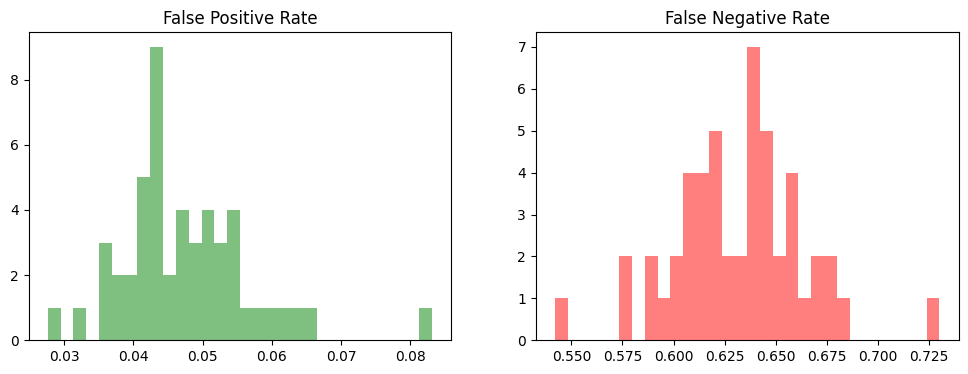

In [69]:
data = data_orig

orig_FPR = data['FPR']
orig_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

**Random Undersampling:**

SRS Random Undersampling performance:

Error type: FPR
Mean: 0.10599617264000002
Variance: 0.0004918306965072037
Variance of estimate: 4.9183069650720365e-06
Standard error: 0.002217725628898227
95% Confidence Interval:  [ 0.10164943040735949 ,  0.11034291487264056 ]
-----------------------------
Error type: FNR
Mean: 0.5104394757
Variance: 0.0010116678518022506
Variance of estimate: 1.0116678518022507e-05
Standard error: 0.0031806726518179306
95% Confidence Interval:  [ 0.5042053573024369 ,  0.5166735940975632 ]
-----------------------------


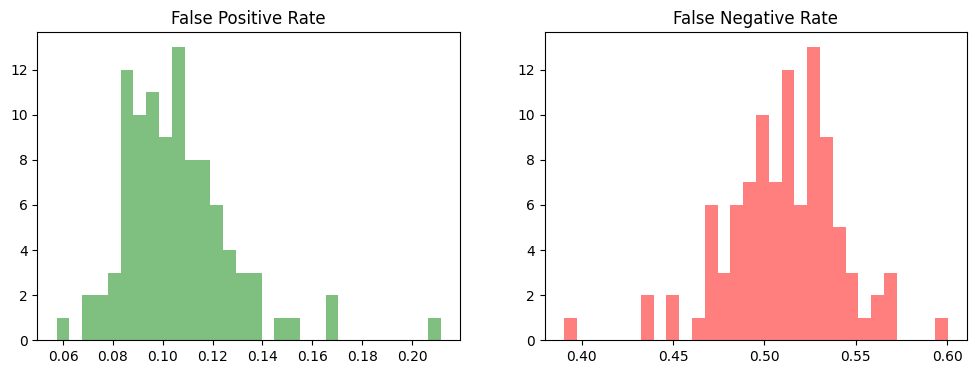

In [70]:
data = data_SRS

SRS_FPR = data['FPR']
SRS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

SRSwR undersampling performance:

Error type: FPR
Mean: 0.10058473314000001
Variance: 0.00023943649925640164
Variance of estimate: 2.3943649925640163e-06
Standard error: 0.001547373578863235
95% Confidence Interval:  [ 0.09755188092542806 ,  0.10361758535457195 ]
-----------------------------
Error type: FNR
Mean: 0.51655358516
Variance: 0.0006119953837713974
Variance of estimate: 6.119953837713974e-06
Standard error: 0.002473854045353924
95% Confidence Interval:  [ 0.5117048312311063 ,  0.5214023390888938 ]
-----------------------------


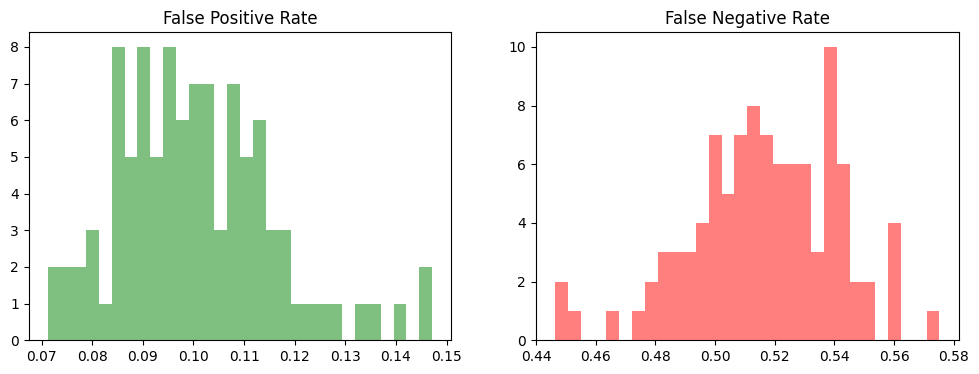

In [71]:
data = data_SRSwR

SRSwR_FPR = data['FPR']
SRSwR_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Undersampling performance:

Error type: FPR
Mean: 0.10104614075689344
Variance: 0.0003334485374463777
Variance of estimate: 3.334485374463777e-06
Standard error: 0.001826057330552296
95% Confidence Interval:  [ 0.09746706838901094 ,  0.10462521312477595 ]
-----------------------------
Error type: FNR
Mean: 0.5174942174393677
Variance: 0.0008883304486829388
Variance of estimate: 8.883304486829387e-06
Standard error: 0.0029804872901640408
95% Confidence Interval:  [ 0.5116524623506462 ,  0.5233359725280893 ]
-----------------------------


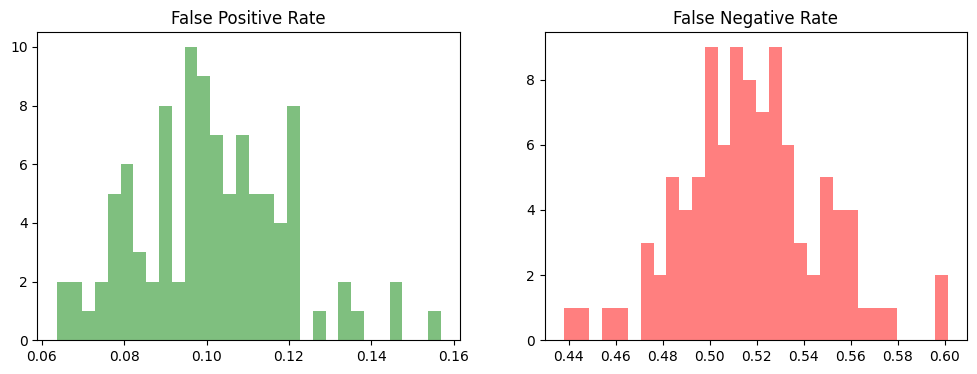

In [72]:
data = data_Sy

Sy_FPR = data['FPR']
Sy_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Multiple Systematic undersampling performance:

Error type: FPR
Mean: 0.10168403143821812
Variance: 0.00031253428379091286
Variance of estimate: 3.1253428379091287e-06
Standard error: 0.0017678639195110942
95% Confidence Interval:  [ 0.09821901815597638 ,  0.10514904472045987 ]
-----------------------------
Error type: FNR
Mean: 0.5168696993244486
Variance: 0.0007984664654582433
Variance of estimate: 7.984664654582433e-06
Standard error: 0.0028257148926568005
95% Confidence Interval:  [ 0.5113312981348412 ,  0.522408100514056 ]
-----------------------------


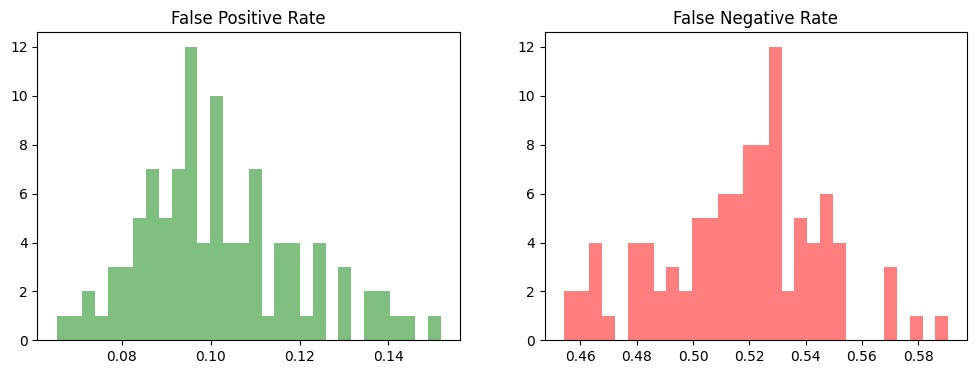

In [73]:
data = data_Sym

Sym_FPR = data['FPR']
Sym_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

**Random Oversampling:**

SRS Oversampling performance:

Error type: FPR
Mean: 0.11164363171583241
Variance: 0.0002581499504125376
Variance of estimate: 2.581499504125376e-06
Standard error: 0.001606704547863538
95% Confidence Interval:  [ 0.10849449080201988 ,  0.11479277262964495 ]
-----------------------------
Error type: FNR
Mean: 0.49250578257979943
Variance: 0.0005182769212119365
Variance of estimate: 5.182769212119365e-06
Standard error: 0.0022765696150391194
95% Confidence Interval:  [ 0.48804370613432274 ,  0.4969678590252761 ]
-----------------------------


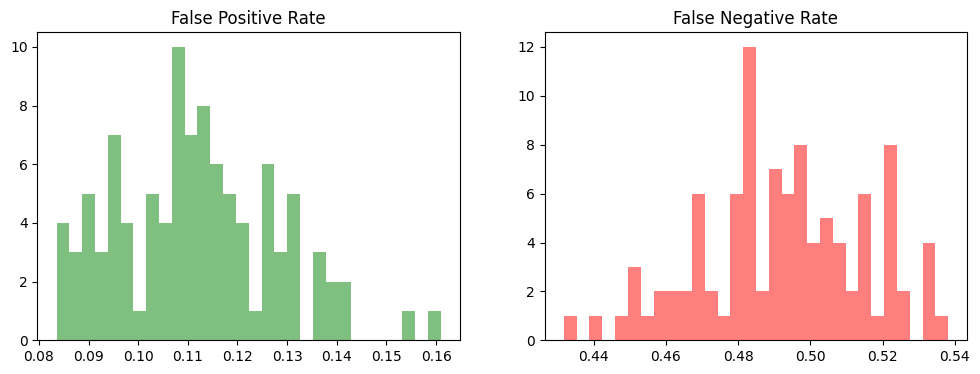

In [74]:
data = data_SRS_ROS

SRS_ROS_FPR = data['FPR']
SRS_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

Systematic Resampling performance:

Error type: FPR
Mean: 0.11066340627999999
Variance: 0.00033628617898599485
Variance of estimate: 3.3628617898599483e-06
Standard error: 0.0018338107290175691
95% Confidence Interval:  [ 0.10706913725112555 ,  0.11425767530887443 ]
-----------------------------
Error type: FNR
Mean: 0.49450269858999996
Variance: 0.000731909861637636
Variance of estimate: 7.3190986163763605e-06
Standard error: 0.002705383266078276
95% Confidence Interval:  [ 0.48920014738848655 ,  0.49980524979151336 ]
-----------------------------


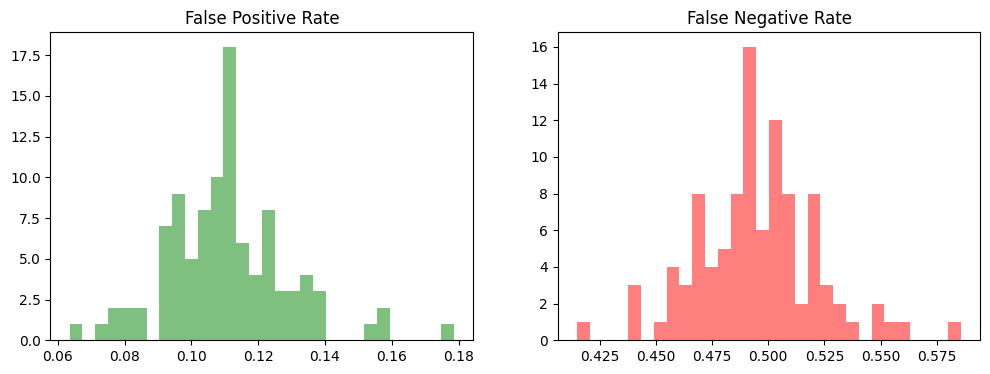

In [75]:
data = data_Sy_ROS

Sy_ROS_FPR = data['FPR']
Sy_ROS_FNR = data['FNR']

fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(data['FPR'], color='g', bins=30, label='FPR', alpha=0.5)
plt.title('False Positive Rate')

plt.subplot(1, 2, 2)
plt.hist(data['FNR'], color='r', bins=30, label='FNR', alpha=0.5)
plt.title('False Negative Rate')
# plt.show()

perf_metrics(data, 'FPR')
perf_metrics(data, 'FNR')

In [76]:
FPR = pd.DataFrame()

DF = FPR


DF['SRS_RUS'] = SRS_FPR
DF['SRSwR_RUS'] = SRSwR_FPR
DF['Sy_RUS'] = Sy_FPR
DF['Sy_m_RUS'] = Sym_FPR
DF['SRS_ROS'] = SRS_ROS_FPR
DF['Sy_ROS'] = Sy_ROS_FPR
DF['Orig'] = orig_FPR
FPR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.145652,0.085477,0.104827,0.092282,0.160961,0.139911,0.062726
1,0.102063,0.089730,0.093983,0.088029,0.108441,0.076122,0.055709
2,0.086328,0.098448,0.079736,0.111418,0.139485,0.136296,0.046566
3,0.124601,0.098448,0.100999,0.115246,0.112481,0.155858,0.055071
4,0.116947,0.082501,0.122262,0.085690,0.135233,0.122475,0.060387
...,...,...,...,...,...,...,...
95,0.093132,0.100574,0.091431,0.074633,0.130555,0.104189,NaN
96,0.086966,0.080799,0.072720,0.101425,0.109079,0.127153,NaN
97,0.126940,0.088879,0.084627,0.130768,0.093345,0.063576,NaN
98,0.087604,0.086115,0.063576,0.081225,0.110568,0.110993,NaN


<Axes: title={'center': 'FPR'}>

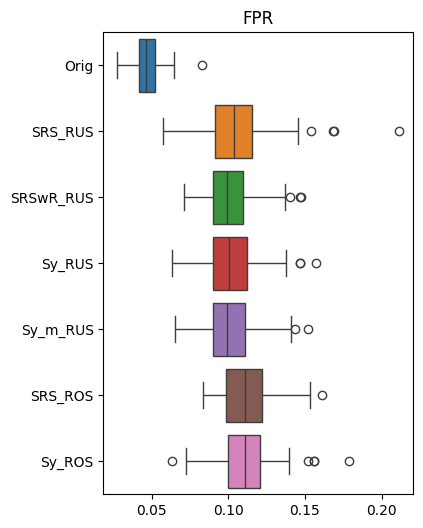

In [81]:
dataset = FPR

plt.figure(figsize=(4,6)) #, dpi=600)
plt.title('FPR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')

In [78]:
FNR = pd.DataFrame()

DF = FNR


DF['SRS_RUS'] = SRS_FNR
DF['SRSwR_RUS'] = SRSwR_FNR
DF['Sy_RUS'] = Sy_FNR
DF['Sy_m_RUS'] = Sym_FNR
DF['SRS_ROS'] = SRS_ROS_FNR
DF['Sy_ROS'] = Sy_ROS_FNR
DF['Orig'] = orig_FNR
FNR

,SRS_RUS,SRSwR_RUS,Sy_RUS,Sy_m_RUS,SRS_ROS,Sy_ROS,Orig
0,0.449499,0.542020,0.505783,0.530455,0.431766,0.455667,0.575173
1,0.513493,0.527371,0.528142,0.538165,0.498072,0.562066,0.592136
2,0.541249,0.516577,0.549730,0.488820,0.447186,0.456438,0.628373
3,0.481881,0.521974,0.511951,0.500386,0.490362,0.438705,0.615266
4,0.486507,0.551272,0.471858,0.552043,0.470316,0.474171,0.598304
...,...,...,...,...,...,...,...
95,0.531226,0.513493,0.531226,0.570547,0.460293,0.501157,NaN
96,0.540478,0.538936,0.561295,0.511180,0.500386,0.464919,NaN
97,0.471858,0.538165,0.545104,0.466461,0.513493,0.585968,NaN
98,0.529684,0.542791,0.601388,0.545875,0.497301,0.497301,NaN


<Axes: title={'center': 'FNR'}>

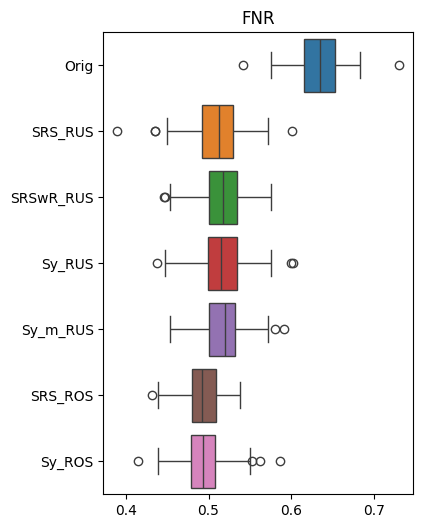

In [83]:
dataset = FNR

plt.figure(figsize=(4,6)) #, dpi=600)
plt.title('FNR')
sns.boxplot([dataset['Orig'], dataset['SRS_RUS'], dataset['SRSwR_RUS'],
             dataset['Sy_RUS'], dataset['Sy_m_RUS'], dataset['SRS_ROS'], dataset['Sy_ROS']], orient='h')